# CS 109A/AC 209A/STAT 121A Data Science: Lab 6
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, October 26th, 2016 at 11:59pm

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Vocareum Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW4.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Verify your submission by checking your submission status on Vocareum!**

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [1]:
import matplotlib
import numpy as np
import pandas as pd

import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn import linear_model
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[Last, First]

### Part (b): Course Number

[CS 109a or STATS 121a or AC 209a]

### Part (c): Who did you work with?

[First and Land names of students with whom you have collaborated]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Classification

In this problem, your task is to classify images of handwritten digits. 

The data set is provided in the file `dataset_1.txt` and contains 8x8 gray-scale images of hand-written digits, flattened to a 64-length vector. The last column contains the digit. For simplicity, we have only included digits 0, 1 and 3. 

We want you to build a model that can be given the image of a hand-written digit and correctly classify this digit as 0, 1 or 3.

### Step 1: Read in the data and visualize

In [2]:
#Load the data
data = np.loadtxt('datasets/dataset_1.txt', delimiter=',')
print data[0:2]

[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.   0.]
 [  0.   0.   1.   9.  15.  11.   0.   0.   0.   0.  11.  16.   8.  14.
    6.   0.   0.   2.  16.  10.   0.   9.   9.   0.   0.   1.  16.   4.
    0.   8.   8.   0.   0.   4.  16.   4.   0.   8.   8.   0.   0.   1.
   16.   5.   1.  11.   3.   0.   0.   0.  12.  12.  10.  10.   0.   0.
    0.   0.   1.  10.  13.   3.   0.   0.   0.]]


In [3]:
#Split into predictor and response
x = data[:, :-1]
y = data[:, -1]

#Print shapes of predictor and response arrays
print 'predictor matrix shape:', x.shape
print 'response array shape:', y.shape

predictor matrix shape: (543, 64)
response array shape: (543,)


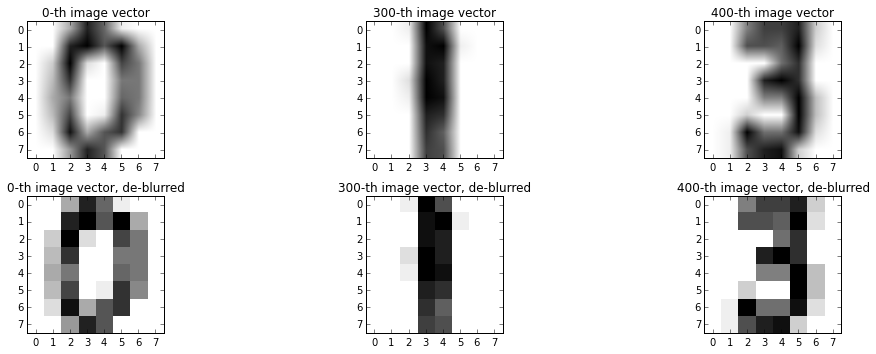

In [4]:
#Plot a couple of images from the dataset
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

#Plot the 0th image vector
ax[0, 0].imshow(x[0].reshape(8, 8), cmap = plt.cm.gray_r)
ax[0, 0].set_title('0-th image vector')

#Plot the 300th image vector
ax[0, 1].imshow(x[300].reshape(8, 8), cmap = plt.cm.gray_r)
ax[0, 1].set_title('300-th image vector')

#Plot the 400th image vector
ax[0, 2].imshow(x[400].reshape(8, 8), cmap = plt.cm.gray_r)
ax[0, 2].set_title('400-th image vector')

#Plot the 0th image vector, with de-blurring
ax[1, 0].imshow(x[0].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
ax[1, 0].set_title('0-th image vector, de-blurred')

#Plot the 300th image vector, with de-blurring
ax[1, 1].imshow(x[300].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
ax[1, 1].set_title('300-th image vector, de-blurred')

#Plot the 400th image vector, with de-blurring
ax[1, 2].imshow(x[400].reshape(8, 8), cmap = plt.cm.gray_r, interpolation = 'nearest')
ax[1, 2].set_title('400-th image vector, de-blurred')

plt.tight_layout()
plt.show()

### Step 2:  Reduce the data

Images data are typically high dimensional (the image vector has one feature for every pixel). Thus, to make working with image data more tractible, one might first apply a dimension reduction technique to the data. That is, we want to **project** the data onto a smaller space (think line or plane).

**Question:** How many dimensions to which should we reduce the data?

**Question:** Which subspace should we project the data onto?

Let's just experiment a bit: trial and error.

We'll try to project the data down to 2 dimensions and three dimensions. We'll randomnly select some predictors and project the data down to the plane or cube defined by these predictors.

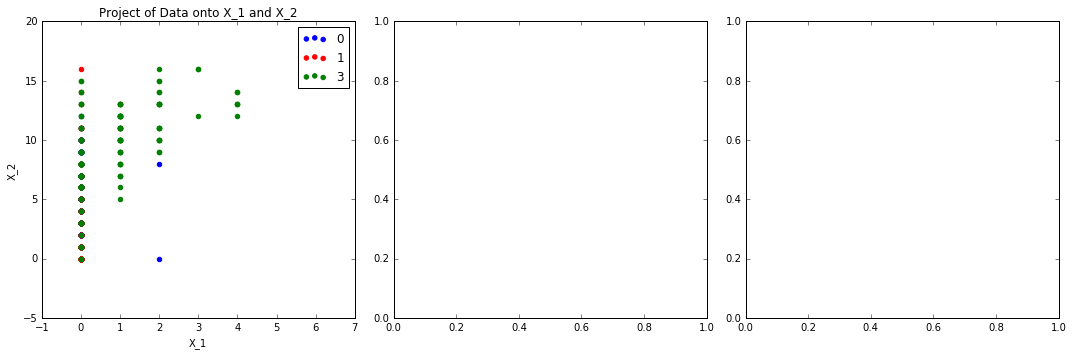

In [8]:
#Let's project the data onto some random 2D planes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Project onto axes: 1, 2
x_2d = x[:, [1, 2]]

ax[0].scatter(x_2d[y==0, 0], x_2d[y==0, 1], color='b', label='0')
ax[0].scatter(x_2d[y==1, 0], x_2d[y==1, 1], color='r', label='1')
ax[0].scatter(x_2d[y==3, 0], x_2d[y==3, 1], color='g', label='3')

ax[0].set_xlabel('X_1')
ax[0].set_ylabel('X_2')
ax[0].set_title('Project of Data onto X_1 and X_2')
ax[0].legend()

#Project onto axes: PICK TWO RANDOM PREDICTORS



#Project onto axes: PICK TWO RANDOM PREDICTORS


plt.tight_layout()
plt.show()

Are these projections useful? That is do they reduce the data in a way that makes it possible for us to perform our task?

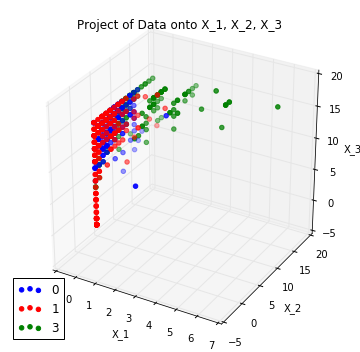

In [9]:
#Let's project the data onto some random 2D planes
fig = plt.figure(figsize=(15, 5))


#Project onto axes: 1, 2, 3
x_2d = x[:, [1, 2, 3]]

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_2d[y==0, 0], x_2d[y==0, 1], x_2d[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_2d[y==1, 0], x_2d[y==1, 1], x_2d[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_2d[y==3, 0], x_2d[y==3, 1], x_2d[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')


#Project onto axes: PICK THREE RANDOM PREDICTORS


#Project onto axes: PICK THREE RANDOM PREDICTORS


plt.tight_layout()
plt.show()

Are these projections useful? That is do they reduce the data in a way that makes it possible for us to perform our task?

Let's now try reducing the number of dimensions in the data using PCA. Why is PCA a valid technique for dimension reduction? Why is PCA appropriate in the context of our task?

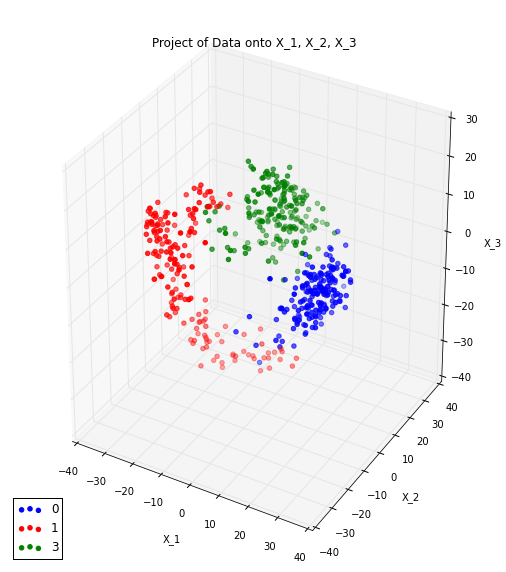

In [18]:
#Apply PCA to data and get the top 3 axes of maximum variation
pca = PCA(n_components = 3)
pca.fit(x)

#Project to the data onto the three axes
x_reduced = pca.transform(x)

#Visualized our reduced data
fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(1, 3, 1,  projection='3d')

ax1.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], x_reduced[y==0, 2], c='b', color='b', label='0')
ax1.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], x_reduced[y==1, 2], c='r', color='r', label='1')
ax1.scatter(x_reduced[y==3, 0], x_reduced[y==3, 1], x_reduced[y==3, 2], c='g', color='g', label='3')

ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_zlabel('X_3')
ax1.set_title('Project of Data onto X_1, X_2, X_3')
ax1.legend(loc='lower left')

plt.show()


In [13]:
#Apply PCA to data and get the top 2 axes of maximum variation
pca2 = PCA(n_components = 2)
pca2.fit(x)

#Project to the data onto the two axes
x_reduced2 = pca2.transform(x)

len(x_reduced2)

# #Visualized our reduced data
# plt.scatter(x_reduced2[y==0, 0], x_reduced2[y==0, 1], c='b', color='b', label='0')
# plt.scatter(x_reduced2[y==1, 0], x_reduced2[y==1, 1], c='r', color='r', label='1')
# plt.scatter(x_reduced2[y==3, 0], x_reduced2[y==3, 1], c='g', color='g', label='3')
# plt.legend()
# plt.show()

543

Are the PCA dimension reductions any good? What does a "good" dimension reduction mean in the context of our task? 

Can you interpret the components of the PCA in the context of our application? What is a component of the PCA (in terms of predictors) again?

In [20]:
###Get the top n components of your PCA
component_1 = pca.components_[0]
component_2 = pca.components_[1]
component_1, component_2

###Display the principal components of PCA as digital images
#plt.imshow( ... )

(array([  6.10475987e-18,  -4.07378040e-03,   1.26328614e-02,
          4.73018530e-02,  -5.04679309e-03,  -5.70936269e-02,
         -1.59955009e-02,  -9.28953452e-05,  -4.18342707e-05,
          3.65160758e-03,   1.77646581e-01,   1.87523760e-02,
         -5.92735029e-02,   6.93119066e-02,  -4.29300931e-03,
         -1.31297923e-04,  -2.09521567e-05,   7.49854014e-02,
          2.14150613e-01,  -1.85132073e-01,  -2.84989497e-01,
          1.21432620e-01,   7.37837854e-02,   0.00000000e+00,
         -1.91031044e-05,   9.31258704e-02,   1.29738194e-01,
         -2.95904287e-01,  -3.25201527e-01,   1.01058954e-01,
          1.49509252e-01,   0.00000000e+00,   0.00000000e+00,
          1.19989938e-01,   1.29398196e-01,  -2.75176629e-01,
         -3.32237146e-01,   8.74394968e-02,   1.64076339e-01,
          0.00000000e+00,   0.00000000e+00,   7.70153679e-02,
          2.05281613e-01,  -1.98372561e-01,  -2.73897899e-01,
          1.18385044e-01,   1.24582328e-01,   0.00000000e+00,
        

Look at the projection of your data onto the first two components of the PCA again, how is each class expressed in terms of the two components, does this make any sense?

### Step 3: Build a classifier

So far, we have only learned models that distinguishes between two classes. Develop and implement a **simple and naive** method of distinguishing between the three digits in our reduced dataset using binary classifiers. 

In [12]:
###Build a classifier to distinguish between 0 and 1

#Remove all instances of class 3
x_binary = x_reduced[y != 3, :]

#Remove all instances of class 3
y_binary = y[y != 3]

#Fit logistic regression model for 0 vs 1
logistic_01 = LogReg()
logistic_01.fit(x_binary, y_binary)


###Build a classifier to distinguish between 1 and 3


###Build a classifier to distinguish between 0 and 3

#Use 0 vs 1 classifier
y_pred_01 = logistic_01.predict(x_reduced)

#Use 1 vs 3 classifier

#Use 0 vs 3 classifier


###Predict a label for our dataset using each of the binary classifiers above


#Now, for each image, we have THREE predictions!
#To make a final decision for each image, we just take a majority vote.


#For each image, label it with the class that get the most votes


#Compute the accuracy of your predictions on the reduced dataset

Is this accuracy meaningful? We've already seen cases where high R^2 values can be deeply misleading. Is an high accuracy rate mean we've learned a good classifier? Shouldn't there be a more intuitive way to assess the quality of our classifiers?

In [13]:
#Scatter plot of our data

#Plot decision boundaries for 0 vs 1

#Plot decision boundaries for 1 vs 3

#Plot decision boundaries for 0 vs 3